## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [34]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler

In [35]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
numUsers = np.size(X,0)

# Store the number of movies for further usages.
numMovies = np.size(X,1)

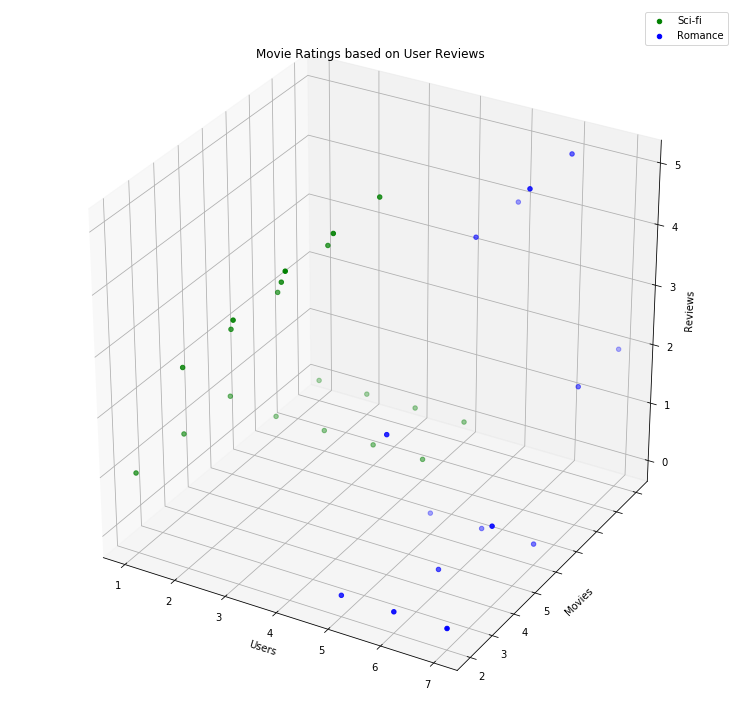

In [36]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.

users = []
movies = []
reviews = []
user_count = 0 
for user in X: 
  movie_count = 0
  for review in user:
    users.append(user_count)
    movies.append(movie_count)
    reviews.append(review)
    movie_count+=1
  user_count+=1


# 2. Set the figure size to (13,13) by using the function plt.figure().
figr = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.
ax = figr.add_subplot(111, projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
plt.rcParams['legend.fontsize'] = 10

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.
ax.scatter(users[:20],movies[:20],reviews[:20],label="Sci-fi",color="g")

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.
ax.scatter(users[20:],movies[20:],reviews[20:],label="Romance",color="b")
# 7. Set the legend to a proper position using ax.legend(loc=?)
ax.legend(loc=0)

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
ax.set_zlabel('Reviews')

# 9. Set the title of this fig using plt.title()
plt.title("Movie Ratings based on User Reviews")
# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()
ax.set_xticklabels([0,1,2,3,4,5,6,7])
ax.set_yticklabels([1,2,3,4,5])
# 11. plot and present the fig using plt.show()
plt.show()

In [37]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
# 2. Subtract the mean from the data set
# 3. Store the new centered data set
X_centered = StandardScaler().fit_transform(X)

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [38]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values

u,s,vT = np.linalg.svd(X_centered)

In [39]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[-0.011 -0.698  0.127  0.581 -0.386  0.031  0.099]
 [ 0.259 -0.154  0.074 -0.164  0.11  -0.791  0.488]
 [ 0.394  0.118  0.047 -0.33  -0.544  0.414  0.503]
 [ 0.529  0.39   0.021  0.651  0.319  0.114  0.171]
 [-0.368  0.328 -0.677  0.27  -0.354 -0.205  0.239]
 [-0.544  0.336  0.67   0.156 -0.049 -0.009  0.341]
 [-0.257 -0.321 -0.262 -0.074  0.56   0.383  0.544]]

S =
[5.467 2.132 0.751 0.    0.   ]

V.T =
[[ 0.465  0.438  0.465 -0.433 -0.433]
 [ 0.303  0.451  0.303  0.554  0.554]
 [ 0.438 -0.778  0.438  0.077  0.077]
 [-0.266 -0.     0.266  0.655 -0.655]
 [ 0.655  0.    -0.655  0.266 -0.266]]



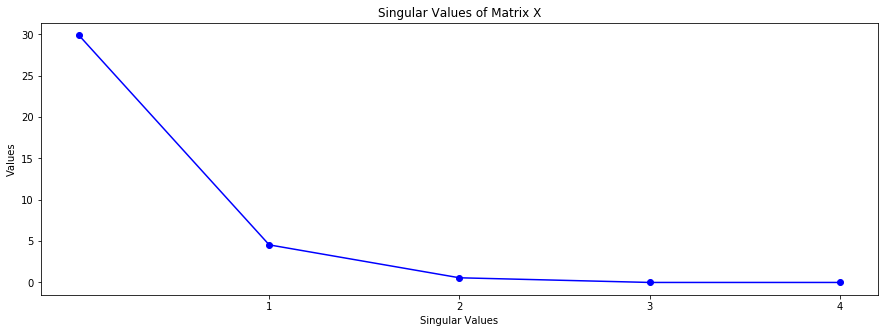

In [40]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
D = s*s


# 2. Set the fig size to (15,5)
figr = plt.figure(figsize=(15,5))

# 3. Add the line chart using plt.plot( ?? ,'bo-')
plt.plot(D,'bo-')

# 3. Add proper tital, ticks, axis labels
plt.title('Singular Values of Matrix X')
plt.xlabel('Singular Values')
plt.ylabel('Values')
plt.xticks(ticks=[1,2,3,4])
plt.show()

In [41]:
#from the graph above k=2 seems the best choice as it maintains the greatest majority of the info of the original dataset

# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
k = 2
# 2. Obtain the first k of v^T and store it
k_vT = vT[:k].T
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
compX = np.matmul(X,k_vT)
# 4. Print the compressed value of X
print("Compressed X:\n",compX)

Compressed X:
 [[ 1.3688767   1.05671321]
 [ 4.1066301   3.17013963]
 [ 5.47550681  4.22685284]
 [ 6.84438351  5.28356605]
 [-2.58752051  5.33132463]
 [-4.32950699  5.53727266]
 [-1.29376026  2.66566232]]


Let's visualize what just happened.

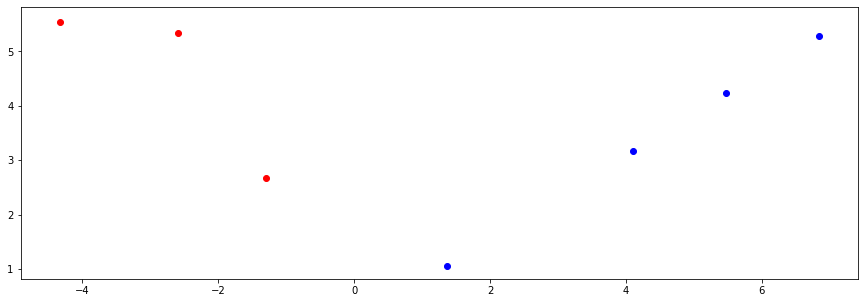

In [42]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
fig = plt.figure(figsize=(15,5))
# 2. Create propor title, axis and legend
class1x = compX[0:4,1]
class1y = compX[0:4,0]
class2x = compX[4:,1]
class2y = compX[4:,0]
plt.scatter(compX[:,0][:4],compX[:,1][:4],c="b")
plt.scatter(compX[:,0][4:],compX[:,1][4:],c="r")
# 3. Plot the data
plt.show()


## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [43]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values 

XTX = np.matmul(X_centered.T,X_centered)

eigen_vals,eigen_vectors = np.linalg.eig(XTX)

In [44]:
print("V (Eigen-vectors) = ")
print(np.around(eigen_vectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigen_vals, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigen_vals)), decimals=3))

V (Eigen-vectors) = 
[[-0.465 -0.303  0.438 -0.002  0.707]
 [-0.438 -0.451 -0.778  0.     0.   ]
 [-0.465 -0.303  0.438  0.002 -0.707]
 [ 0.433 -0.554  0.077 -0.707 -0.013]
 [ 0.433 -0.554  0.077  0.707  0.013]]

diagonal elements of D (Eigen-values) = 
[29.891  4.546  0.564 -0.     0.   ]

sqrt(Eigen-values) = 
[5.467 2.132 0.751 0.    0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [45]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people


In [46]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
lfw_people = fetch_lfw_people(min_faces_per_person=70)


# 2. Store the number of images and its hight, width using lfw_people.images.shape
num_images, h, w = lfw_people.images.shape

# 3. Calculate number of pixels
num_pixels = h*w
print(num_pixels)

# 4. Store the pixel values using lfw_people.data
X = np.array(lfw_people.data)
y = lfw_people.target
names = lfw_people.target_names


2914


In [47]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

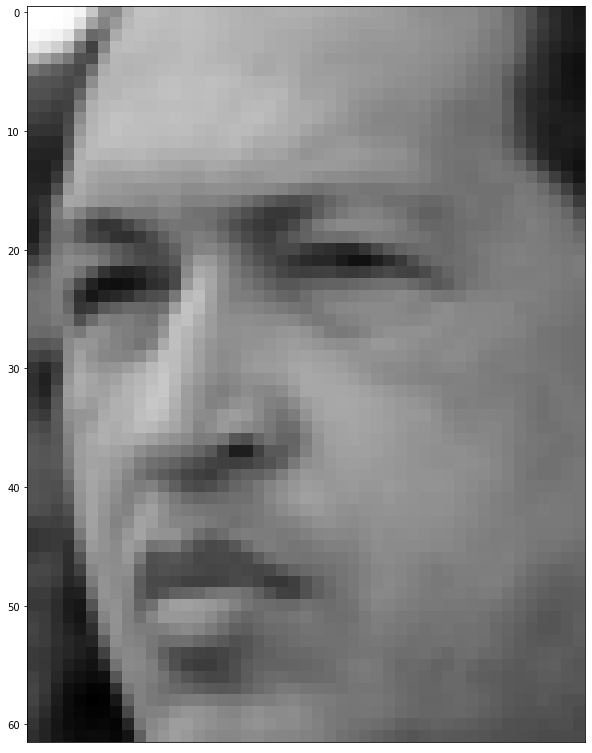

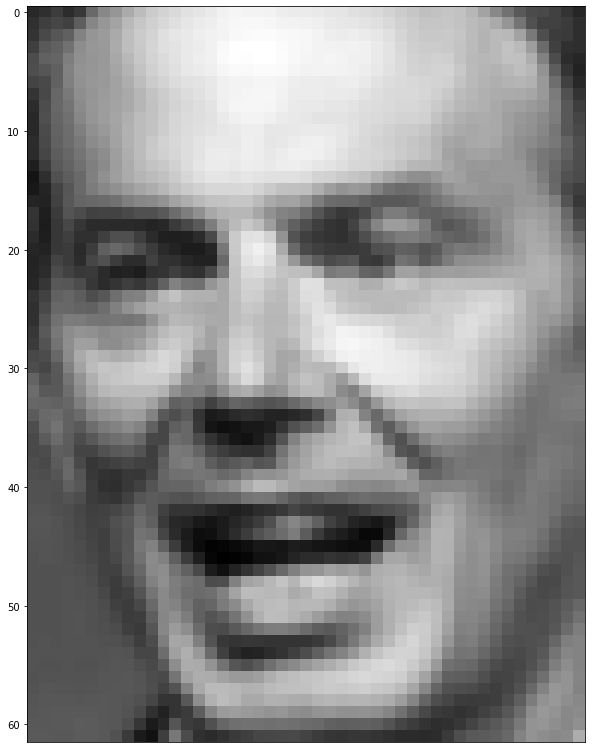

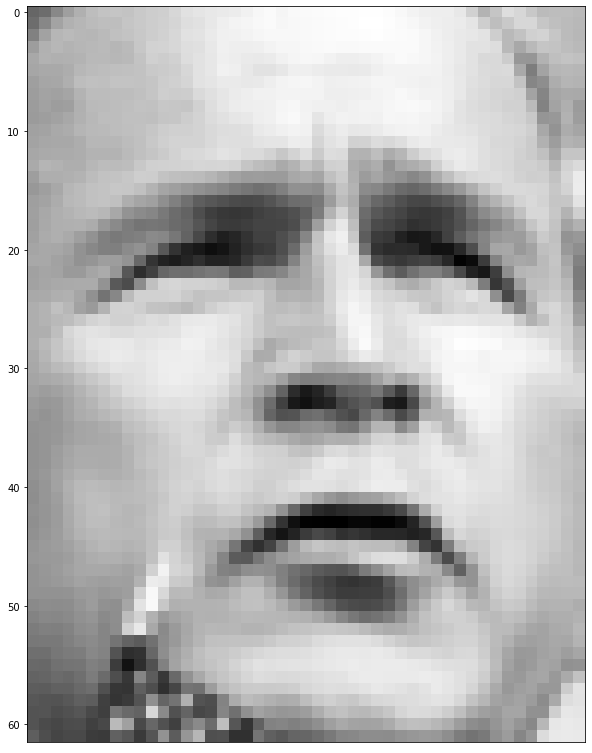

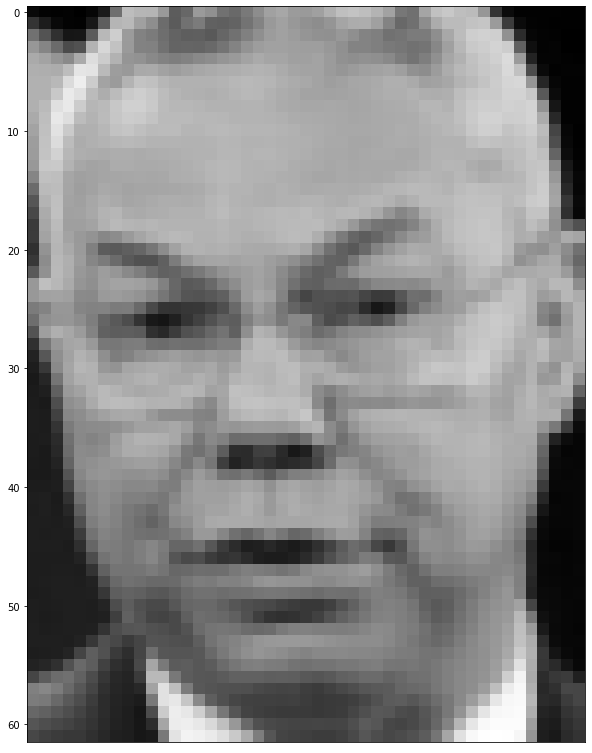

In [48]:
# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
# 2. Use plt_face()
# 3. plt.show()
for i in range(4):
  plt.figure(figsize=(10,20))
  plt_face(X[i])
  plt.show()


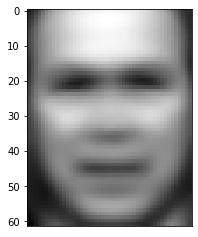

In [49]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
# 2. Remove the mean from all the image
# 3. plot the face use plt_face()
X_mean = np.mean(X,axis = 0)
X_mean = X_mean[np.newaxis,:]
plt_face(X_mean)


In [50]:
X_centered = X - X_mean
# Find eig vec and eig value:

# 1. Calculate the covariance metric of the zero_mean data
# 2. Use the np.linalg.eig() to compute eig value and eig vectors
u,s,vT = np.linalg.svd(X_centered)
eigval = s*s
eigvectors = vT

# 3. Find the top5 features
top5 = eigvectors[:5]

# 4. Calculate the new value based on the top5 feature.


# 5. Store the new value.

In [51]:
print("Top 5 Vector:")
print()
print(eigvectors.real)
print()
print("Top 5 EigVal:")
print()
print(eigval.real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()

Top 5 Vector:

[[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [ 0.01745991  0.01647563  0.01628433 ... -0.03319881 -0.03265479
  -0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 ...
 [ 0.01192592  0.01480461 -0.01030483 ...  0.25777686 -0.13530856
   0.0409677 ]
 [ 0.02504288 -0.00110683 -0.03829177 ... -0.14145193  0.25384158
  -0.10121194]
 [ 0.00328378  0.04502905 -0.05614464 ...  0.03756183 -0.08395126
   0.13913788]]

Top 5 EigVal:

[9.8932755e+08 7.9189370e+08 3.8294509e+08 ... 1.6410145e+03 1.6129268e+03
 9.9713588e-03]

Associateed 5 attributes in fourth image
Indexing by [[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [ 0.01745991  0.01647563  0.01628433 ... -0.03319881 -0.03265479
  -0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 [ 0.03351924  0.03528838  0.03671131 ...  0.0384081   0.03525075
   0.02920213]
 [ 0.013

In [52]:
print("Top 5 EigVal:")
print()
print(eigval.real)

Top 5 EigVal:

[9.8932755e+08 7.9189370e+08 3.8294509e+08 ... 1.6410145e+03 1.6129268e+03
 9.9713588e-03]


In [53]:
# prjection of fourth face to first 5 principle components

The projection of fourth image, d = 5


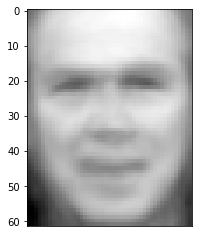

In [54]:
# prjection of fourth face to first 5 principle components
print("The projection of fourth image, d = 5")
top5 = eigvectors[:5]
projection_4 = np.matmul(X[3],top5.T)
projection_4 = projection_4[np.newaxis,:]
updated_X4_5 = np.dot(projection_4,top5)+ X_mean
plt_face(updated_X4_5)

The projection of 4 image, d=50


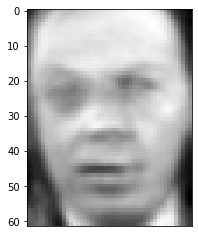

In [55]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace
print("The projection of 4 image, d=50")
top50 = eigvectors[:50]
projection_50 = np.matmul(X[3],top50.T)
projection_50 = projection_50[np.newaxis,:]
updated_X4_50 = np.dot(projection_50,top50)+ X_mean
plt_face(updated_X4_50)